## EX6.2 - Time variable solution for feedback lakes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters of two lakes
V = np.array([0.2, 10])*1e6  # volume, m^3
H = np.array([4, 20])  # mean depth, m
A = np.array([0.05, 0.5])*1e6 # surface area, m^2
W = np.array([2000, 4000]) # loading, kg/yr

In [3]:
Q = 1e6 # outflow, m^3/yr
alpha = 0.5 # fraction of feedback flow
v = 10 # pollutant settling, m/yr

## (a) steady state solution

Mass balance equation:

$0 = W_1 - (Q + \alpha Q) c_1 - v A_1 c_1 + \alpha Q c_2$  

$0 = W_2 + (Q + \alpha Q) c_1 - (Q + \alpha Q) c_2 - v A_2 c_2$

In [8]:
A = np.array([[Q+alpha*Q + v*A[0], -alpha*Q], [-(Q+alpha*Q), Q + alpha*Q + v*A[1]]])

In [13]:
B = np.linalg.inv(A)
c0 = np.dot(B, W)
print(c0)

[0.00122449 0.00089796]


## (b) time variable solution

When loading is terminated at $t=0$, determine concentration change from the steady state solution

$dc_1/dt = -\alpha_{11}c_1 + \alpha_{12} c_2$

$dc_2/dt = \alpha_{21}c_1 - \alpha_{22} c_2$

where $\alpha_{11} = Q_{12}/V_1 + k_1$, 

$\alpha_{12} = Q_{21}/V_1$, 

$\alpha_{21} = Q_{12}/V_2$, 

$\alpha_{22} = (Q_{23}+Q_{21})/V_2 + k_2$

In [29]:
a11 = (Q+alpha*Q)/V[0] + v/H[0]
a12 = alpha*Q/V[0]
a21 = (Q+alpha*Q)/V[1]
a22 = (Q+alpha*Q)/V[1] + v/H[1]



In [30]:
lamb_f = 0.5*((a11+a22)+np.sqrt((a11+a22)**2-4*(a11*a22-a12*a21)))
lamb_s = 0.5*((a11+a22)-np.sqrt((a11+a22)**2-4*(a11*a22-a12*a21)))

In [31]:
c1f = ((lamb_f-a22)*c0[0] - a12*c0[1])/(lamb_f-lamb_s)
c1s = (a12*c0[1]-(lamb_s-a22)*c0[0])/(lamb_f-lamb_s)
c2f = (-a21*c0[0]+(lamb_f-a11)*c0[1])/(lamb_f-lamb_s)
c2s = (-(lamb_s-a11)*c0[1]+a21*c0[0])/(lamb_f-lamb_s)
print(c1f,c1s,c2f,c2s)
print(lamb_f,lamb_s)

0.0009812415886433976 0.0002432482072749694 -1.567489197500025e-05 0.0009136340756484696
10.039936372847464 0.6100636271525355


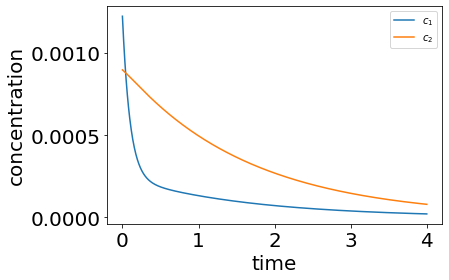

In [42]:
t = np.linspace(0,4,1000)
c1 = c1f*np.exp(-lamb_f*t) + c1s*np.exp(-lamb_s*t)
c2 = c2f*np.exp(-lamb_f*t) + c2s*np.exp(-lamb_s*t)

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20)

plt.plot(t,c1,label='$c_1$')
plt.plot(t,c2,label='$c_2$')
plt.ylabel('concentration')
plt.xlabel('time')
plt.legend()